# Влияние условий жизни учащихся на их успеваемость по математике

## Описание проекта

На основе заранее собранных данных необходимо отследить влиняение условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математики. 

Сформированную модель можно будет использовать для последующего обучения и поиска ребят из группы риска.

## Цель

Подготовить модель, на основе которой можно будет заранее определять ребят из группы риска.



## Этапы работы

### 1. Готовим подходящий инструментарий 

Для непросредственной работы с набором данных нам понадобится __pandas__ (куда же без него). 
Графики будем строить через __pyplot__ и __seaborn__.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

### 2. Загружаем набор данных и проводим их предварительный анализ

In [2]:
df = pd.read_csv('stud_math.csv')

Посмотрим на данные, представленный в датасете. Например, на представленные столбцы:

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Названия нас вполне устраивают, приведем все к нижнему региструю, чтобы в дальнейшем это нас не смущало, а также преобразуем  studytime, granular в studytime_granular:

In [4]:
df.columns = ['studytime_granular' if c == 'studytime, granular' else c.lower() for c in df.columns]

#### Описание каждого из столбоцов:
1. __school__ — аббревиатура школы, в которой учится ученик
2. __sex__ — пол ученика ('F' - женский, 'M' - мужской)
3. __age__ — возраст ученика (от 15 до 22)
4. __address__ — тип адреса ученика ('U' - городской, 'R' - за городом)
5. __famsize__ — размер семьи('LE3' <= 3, 'GT3' >3)
6. __pstatus__ — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. __medu__ — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. __fedu__ — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. __mjob__ — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. __fjob__ — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. __reason__ — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. __guardian__ — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. __traveltime__ — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. __studytime__ — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. __failures__ — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. __schoolsup__ — дополнительная образовательная поддержка (yes или no)
17. __famsup__ — семейная образовательная поддержка (yes или no)
18. __paid__ — дополнительные платные занятия по математике (yes или no)
19. __activities__ — дополнительные внеучебные занятия (yes или no)
20. __nursery__ — посещал детский сад (yes или no)
21. __studytime_granular__ - не описан
22. __higher__ — хочет получить высшее образование (yes или no)
23. __internet__ — наличие интернета дома (yes или no)
24. __romantic__ — в романтических отношениях (yes или no)
25. __famrel__ — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
26. __freetime__ — свободное время после школы (от 1 - очень мало до 5 - очень мого)
27. __goout__ — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
28. __health__ — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
29. __absences__ — количество пропущенных занятий
30. __score__ — баллы по госэкзамену по математике


Посмотрим на количественные и качественные данные, представленные в наборе:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

Всего в наборе 395 строк и 30 столбцов (пускай в описании задания __studytime_granular__ и не указан, но в наборе данных он есть).

Из 30 столбоцов - 3 можно отнести к столбцам с численными данными, 27 - номинативными.

Напишем немного автоматизации для исключения из датасета строк с пустыми значениями, и не только. 


In [6]:
# Анализ номинативных переменных
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Считаем процентное соотношение номинативных величин и выводим
def show_percentage(series):
    '''Выводит роцентное соотношение на основе количество вхождений 
    в группы номинативных переменных
    
    args:
    series - pd.Series.
    '''
    for index, value in series.iteritems():
        print('Доля %s составляет %03.1f процентов.' % (index, value * 100))


# Базовый сценарий для анализа номинативных величин
def show_nominative(series):
    '''Выводит отчет о столбце с номинативными величинами.
    
    args:
    series - pd.Series
    '''
    print(series.value_counts())
    print()
    print('Процентное соотношение номенативных величин:')
    show_percentage(series.value_counts(normalize=True))
    print('Всего записей: %d' % len(series))
    print('Из них НЕ пустых: %d' % sum([i for i in series.value_counts()]))
    print('Из них пустых: %d' % (len(series) - sum([i for i in series.value_counts()])))
        

# Функция для построения ящиков с усами
def get_boxplot(column):
    '''Рисует ящик с усами с распределением оценок для
    групп из номинативной переменной.
        
    args: 
    column - str, имя столбца в df.
    '''
    print(column)
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(
        x=column,
        y='score', 
        data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index)],
        ax=ax
    )
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Выполняем тест Стьюдента для конкретного столбца
def get_stat_diff(column):
    '''Проводит тест стьюдента для проверки
    статистической значимости данных.
        
    args: 
    column - str, имя столбца в df.
    '''
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
            df.loc[df.loc[:, column] == comb[0], 'score'],
            df.loc[df.loc[:, column] == comb[1], 'score']
        ).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

        
# Анализ численных велечин
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Считаем межквартильный размах и смотрим выборосы
def interquantile_range(series, rng, bins=8, coef=1.5):
    '''Рассчитывает межквартильный размах и смотрит на 
    данные за вычетом значний из выбросов
    
    series: pd.Series
    rng: tuple (from, to)
    bins: number of columns for histogram
    '''

    median = series.median()
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
    iqr = perc75 - perc25
    bottom = perc25 - coef*iqr
    top = perc75 + coef*iqr
    
    # Выводим характеристики межквартильного размаха
    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        'IQR: {}, '.format(iqr),
        'Границы выбросов: [{f}, {l}].'.format(f=bottom, l=top)
    )
    
    # Рисуем график
    series.loc[series.between(bottom, top)].hist(bins=bins, range=rng, label='IQR')
    plt.legend()
    
    # Добиваем информацией о возможных выбросах:
    blowouts = series.loc[(series < bottom) | (series > top)]
    
    if len(blowouts):
        print('Выбросы:')
        print(blowouts)
    else:
        print('Выбросы не обнаружены.')

    
# Базовый сценарий для анализа численных величин
def show_numerical(series, rng, bins=8, coef=1.5):
    '''Выводит краткую сводку для численных данных.'''
    print('Основные численные характеристики столбца:')
    print(series.describe())
    interquantile_range(series, rng, bins=bins, coef=coef)    

#### Рассмотрим каждый столбец в отдельности:

__school - аббревиатура школы, в которой учится ученик__

In [7]:
show_nominative(df.school)


GP    349
MS     46
Name: school, dtype: int64

Процентное соотношение номенативных величин:
Доля GP составляет 88.4 процентов.
Доля MS составляет 11.6 процентов.
Всего записей: 395
Из них НЕ пустых: 395
Из них пустых: 0


В наборе находятся данные, собранные от учеников из двух школ. Подавляющее их число из школы "GP"

__sex — пол ученика ('F' - женский, 'M' - мужской)__

Посмотрим на данные по полу учеников.

In [8]:
show_nominative(df.sex)

F    208
M    187
Name: sex, dtype: int64

Процентное соотношение номенативных величин:
Доля F составляет 52.7 процентов.
Доля M составляет 47.3 процентов.
Всего записей: 395
Из них НЕ пустых: 395
Из них пустых: 0


В наборе примерно равное количество учеников мужского и женского пола, ничего особенного здесь нет.

__age — возраст ученика (от 15 до 22)__

Age - это численная характеристика. Посмотрим распределение данных.

Основные численные характеристики столбца:
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Выбросы:
247    22
Name: age, dtype: int64


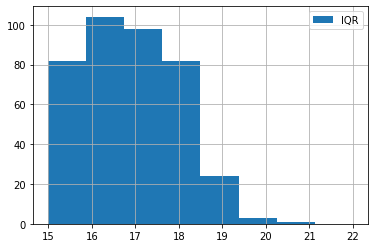

In [9]:
show_numerical(df.age, (15, 22))

__Вывод:__ Для всех учеников в таблице указан возраст. Минимальное значение - 15, максимальное 22. Что укладывается в описание нашего набора данных. Большей части учащихся от 15 до 18 лет.Великовозрастных студентов у нас не так много. 

В выброс попал всего один 22 летний учащийся, его индекс в наборе данных - 247. Посчитаем его за выброс и исключим из набора данных:

In [10]:
df = df.loc[df.age <= 21]

__address — тип адреса ученика ('U' - городской, 'R' - за городом)__

In [11]:
show_nominative(df.address)

U    294
R     83
Name: address, dtype: int64

Процентное соотношение номенативных величин:
Доля U составляет 78.0 процентов.
Доля R составляет 22.0 процентов.
Всего записей: 394
Из них НЕ пустых: 377
Из них пустых: 17


Большая часть учащихся живет в городе. Есть и пустые значения.

__famsize — размер семьи('LE3' <= 3, 'GT3' >3)__

In [12]:
show_nominative(df.famsize)

GT3    260
LE3    107
Name: famsize, dtype: int64

Процентное соотношение номенативных величин:
Доля GT3 составляет 70.8 процентов.
Доля LE3 составляет 29.2 процентов.
Всего записей: 394
Из них НЕ пустых: 367
Из них пустых: 27


У большинства учащихся в семье более 3 человек.

__pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)__

In [13]:
show_nominative(df.pstatus)

T    313
A     36
Name: pstatus, dtype: int64

Процентное соотношение номенативных величин:
Доля T составляет 89.7 процентов.
Доля A составляет 10.3 процентов.
Всего записей: 394
Из них НЕ пустых: 349
Из них пустых: 45


Почти 90% учащихся живут в "полноценных семьях", ну или по крайней мере в таких, где оба родителя живут вместе.

__medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)__

In [14]:
show_nominative(df.medu)

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: medu, dtype: int64

Процентное соотношение номенативных величин:
Доля 4.0 составляет 33.5 процентов.
Доля 2.0 составляет 26.1 процентов.
Доля 3.0 составляет 24.6 процентов.
Доля 1.0 составляет 15.1 процентов.
Доля 0.0 составляет 0.8 процентов.
Всего записей: 394
Из них НЕ пустых: 391
Из них пустых: 3


__Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)__

In [15]:
show_nominative(df.fedu)

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: fedu, dtype: int64

Процентное соотношение номенативных величин:
Доля 2.0 составляет 28.6 процентов.
Доля 3.0 составляет 25.9 процентов.
Доля 4.0 составляет 23.8 процентов.
Доля 1.0 составляет 20.8 процентов.
Доля 0.0 составляет 0.5 процентов.
Доля 40.0 составляет 0.3 процентов.
Всего записей: 394
Из них НЕ пустых: 370
Из них пустых: 24


1 запись имеет значения 40, что явно выбивается из общей картины, и скорее всего тут ошибка при вводе. Поправим запись из набора данных на NaN, поскольку о реальном значении мы можем только догадываться.

In [16]:
df.loc[df.fedu == 40, 'fedu'] = float('nan')

Далее по номинативным признакам особо выводы смысле пока делать нет, просто оценим их пропорции и посмотрим на содержимое.

__mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)__

In [17]:
show_nominative(df.mjob)

other       133
services     97
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

Процентное соотношение номенативных величин:
Доля other составляет 35.5 процентов.
Доля services составляет 25.9 процентов.
Доля at_home составляет 15.5 процентов.
Доля teacher составляет 14.7 процентов.
Доля health составляет 8.5 процентов.
Всего записей: 394
Из них НЕ пустых: 375
Из них пустых: 19


__Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)__

In [18]:
show_nominative(df.fjob)

other       197
services    101
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Процентное соотношение номенативных величин:
Доля other составляет 55.0 процентов.
Доля services составляет 28.2 процентов.
Доля teacher составляет 8.1 процентов.
Доля at_home составляет 4.5 процентов.
Доля health составляет 4.2 процентов.
Всего записей: 394
Из них НЕ пустых: 358
Из них пустых: 36


__reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)__

In [19]:
show_nominative(df.reason)

course        137
home          104
reputation    103
other          33
Name: reason, dtype: int64

Процентное соотношение номенативных величин:
Доля course составляет 36.3 процентов.
Доля home составляет 27.6 процентов.
Доля reputation составляет 27.3 процентов.
Доля other составляет 8.8 процентов.
Всего записей: 394
Из них НЕ пустых: 377
Из них пустых: 17


__guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)__

In [20]:
show_nominative(df.guardian)

mother    249
father     86
other      28
Name: guardian, dtype: int64

Процентное соотношение номенативных величин:
Доля mother составляет 68.6 процентов.
Доля father составляет 23.7 процентов.
Доля other составляет 7.7 процентов.
Всего записей: 394
Из них НЕ пустых: 363
Из них пустых: 31


__traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)__

In [21]:
show_nominative(df.traveltime)

1.0    241
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Процентное соотношение номенативных величин:
Доля 1.0 составляет 65.8 процентов.
Доля 2.0 составляет 26.2 процентов.
Доля 3.0 составляет 6.0 процентов.
Доля 4.0 составляет 1.9 процентов.
Всего записей: 394
Из них НЕ пустых: 366
Из них пустых: 28


__studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов__

In [22]:
show_nominative(df.studytime)

2.0    194
1.0    102
3.0     64
4.0     27
Name: studytime, dtype: int64

Процентное соотношение номенативных величин:
Доля 2.0 составляет 50.1 процентов.
Доля 1.0 составляет 26.4 процентов.
Доля 3.0 составляет 16.5 процентов.
Доля 4.0 составляет 7.0 процентов.
Всего записей: 394
Из них НЕ пустых: 387
Из них пустых: 7


__failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)__

In [23]:
show_nominative(df.failures)

0.0    293
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

Процентное соотношение номенативных величин:
Доля 0.0 составляет 78.8 процентов.
Доля 1.0 составляет 13.2 процентов.
Доля 2.0 составляет 4.3 процентов.
Доля 3.0 составляет 3.8 процентов.
Всего записей: 394
Из них НЕ пустых: 372
Из них пустых: 22


__schoolsup — дополнительная образовательная поддержка (yes или no)__

In [24]:
show_nominative(df.schoolsup)

no     334
yes     51
Name: schoolsup, dtype: int64

Процентное соотношение номенативных величин:
Доля no составляет 86.8 процентов.
Доля yes составляет 13.2 процентов.
Всего записей: 394
Из них НЕ пустых: 385
Из них пустых: 9


__famsup — семейная образовательная поддержка (yes или no)__

In [25]:
show_nominative(df.famsup)

yes    219
no     136
Name: famsup, dtype: int64

Процентное соотношение номенативных величин:
Доля yes составляет 61.7 процентов.
Доля no составляет 38.3 процентов.
Всего записей: 394
Из них НЕ пустых: 355
Из них пустых: 39


__paid — дополнительные платные занятия по математике (yes или no)__

In [26]:
show_nominative(df.paid)

no     199
yes    155
Name: paid, dtype: int64

Процентное соотношение номенативных величин:
Доля no составляет 56.2 процентов.
Доля yes составляет 43.8 процентов.
Всего записей: 394
Из них НЕ пустых: 354
Из них пустых: 40


__activities — дополнительные внеучебные занятия (yes или no)__

In [27]:
show_nominative(df.activities)

yes    195
no     185
Name: activities, dtype: int64

Процентное соотношение номенативных величин:
Доля yes составляет 51.3 процентов.
Доля no составляет 48.7 процентов.
Всего записей: 394
Из них НЕ пустых: 380
Из них пустых: 14


__nursery — посещал детский сад (yes или no)__

In [28]:
show_nominative(df.nursery)

yes    300
no      78
Name: nursery, dtype: int64

Процентное соотношение номенативных величин:
Доля yes составляет 79.4 процентов.
Доля no составляет 20.6 процентов.
Всего записей: 394
Из них НЕ пустых: 378
Из них пустых: 16


__studytime_granular - не описан__

In [29]:
show_nominative(df.studytime_granular)

-6.0     194
-3.0     102
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

Процентное соотношение номенативных величин:
Доля -6.0 составляет 50.1 процентов.
Доля -3.0 составляет 26.4 процентов.
Доля -9.0 составляет 16.5 процентов.
Доля -12.0 составляет 7.0 процентов.
Всего записей: 394
Из них НЕ пустых: 387
Из них пустых: 7


Этот столбец просто перемноженное на -3 значение из столбца studytime, думаю, его можно удалить.

In [30]:
df.drop(['studytime_granular'], inplace=True, axis=1)

__higher — хочет получить высшее образование (yes или no)__

In [31]:
show_nominative(df.higher)

yes    356
no      18
Name: higher, dtype: int64

Процентное соотношение номенативных величин:
Доля yes составляет 95.2 процентов.
Доля no составляет 4.8 процентов.
Всего записей: 394
Из них НЕ пустых: 374
Из них пустых: 20


Подавляющее большинство учащихся желает получить высшее образование, что похвально.

__internet — наличие интернета дома (yes или no)__

In [32]:
show_nominative(df.internet)

yes    304
no      56
Name: internet, dtype: int64

Процентное соотношение номенативных величин:
Доля yes составляет 84.4 процентов.
Доля no составляет 15.6 процентов.
Всего записей: 394
Из них НЕ пустых: 360
Из них пустых: 34


__romantic — в романтических отношениях (yes или no)__

In [33]:
show_nominative(df.romantic)

no     240
yes    123
Name: romantic, dtype: int64

Процентное соотношение номенативных величин:
Доля no составляет 66.1 процентов.
Доля yes составляет 33.9 процентов.
Всего записей: 394
Из них НЕ пустых: 363
Из них пустых: 31


__famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)__

In [34]:
show_nominative(df.famrel)

 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Процентное соотношение номенативных величин:
Доля 4.0 составляет 49.6 процентов.
Доля 5.0 составляет 26.7 процентов.
Доля 3.0 составляет 16.9 процентов.
Доля 2.0 составляет 4.6 процентов.
Доля 1.0 составляет 1.9 процентов.
Доля -1.0 составляет 0.3 процентов.
Всего записей: 394
Из них НЕ пустых: 367
Из них пустых: 27


Одна запись имеет неверно значение. Кроме того, среди записей есть пустые. Затрем и эту, чтобы не портило общую картину:


In [35]:
df.loc[df.famrel == -1, 'famrel'] = float('nan')

__freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)__

In [36]:
show_nominative(df.freetime)

3.0    153
4.0    111
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Процентное соотношение номенативных величин:
Доля 3.0 составляет 39.9 процентов.
Доля 4.0 составляет 29.0 процентов.
Доля 2.0 составляет 16.4 процентов.
Доля 5.0 составляет 9.9 процентов.
Доля 1.0 составляет 4.7 процентов.
Всего записей: 394
Из них НЕ пустых: 383
Из них пустых: 11


__goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)__

In [37]:
show_nominative(df.goout)

3.0    127
2.0    101
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

Процентное соотношение номенативных величин:
Доля 3.0 составляет 32.9 процентов.
Доля 2.0 составляет 26.2 процентов.
Доля 4.0 составляет 21.8 процентов.
Доля 5.0 составляет 13.2 процентов.
Доля 1.0 составляет 6.0 процентов.
Всего записей: 394
Из них НЕ пустых: 386
Из них пустых: 8


__health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)__

In [38]:
show_nominative(df.health)

5.0    138
3.0     89
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64

Процентное соотношение номенативных величин:
Доля 5.0 составляет 36.4 процентов.
Доля 3.0 составляет 23.5 процентов.
Доля 4.0 составляет 16.6 процентов.
Доля 1.0 составляет 12.1 процентов.
Доля 2.0 составляет 11.3 процентов.
Всего записей: 394
Из них НЕ пустых: 379
Из них пустых: 15


__absences — количество пропущенных занятий__

Основные численные характеристики столбца:
count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Выбросы:
40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64


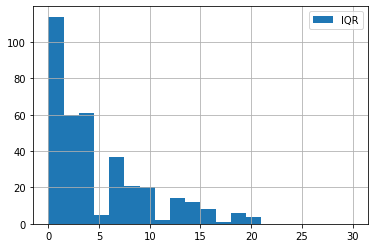

In [39]:
show_numerical(df.absences, (0, 30), bins=20)

В данном случае в количестве пропущенных занятий мы видим большое количество выбросов. Два из них: 222 и 390 явно не укладываются в общую картину, остальные имеют права на жизнь, так как это 2% от нашего набора данных, и они могут оказать некоторое влияние на нашу будущую модель. 

Поправим коэффициент интерквантильного размаха с 1.5 на 2 и зацепим если не все потерянные значения, то хотя бы часть из них:

Основные численные характеристики столбца:
count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-16.0, 24.0].
Выбросы:
40      25.0
74      54.0
103     26.0
183     56.0
205     28.0
222    385.0
276     75.0
280     30.0
307     38.0
315     40.0
390    212.0
Name: absences, dtype: float64


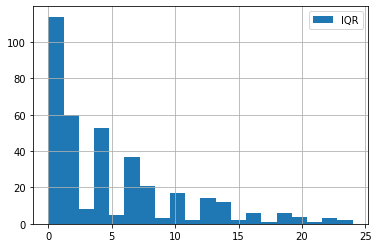

In [40]:
show_numerical(df.absences, (0, 24), bins=20, coef=2)

Большая часть учеников пропустила не более 8 занятий.

Исключим выбросы из набора данных:

In [41]:
df = df.loc[df.absences <= 24]

__Вывод:__ прогулов у учащихся не так много, в рассматриваемом нами наборе данных отсутствий у большинства не более 8. 

__score — баллы по госэкзамену по математике__

Наконец мы добрались до самого важного столбца - столбца с оценками:



Основные численные характеристики столбца:
count    366.000000
mean      52.172131
std       23.036490
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
25-й перцентиль: 41.25, 75-й перцентиль: 70.0, IQR: 28.75,  Границы выбросов: [-1.875, 113.125].
Выбросы не обнаружены.


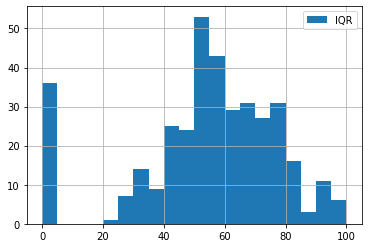

In [42]:
show_numerical(df.score, (0, 100), bins=20)

Отлично! Чисто в теории, выбросов не обнаружено.
Посмотрим, есть ли пустые значения:

In [43]:
df.loc[pd.isna(df.score)]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Пустые значения есть. Но не ясно, как их интерпретировать, поскольку цель нашего проекта как раз оценить влияние среды на итоговую оценку. Поэтому подчистим их:

In [44]:
df = df.loc[pd.isna(df.score) == False]

Еще один момент, бросающийся в глаза - это наличие оценки 0 в данных, посмотрим на них:

In [45]:
df.loc[df.score == 0]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


Записи про учащихся с оценкой 0 также не пропускают занятия. Кажется, что данные с ними не совсем верны. Исключим их также из набора:

In [46]:
df = df.loc[df.score != 0]

Посмотрим на наш столбец еще раз:

Основные численные характеристики столбца:
count    330.000000
mean      57.863636
std       16.075323
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].
Выбросы не обнаружены.


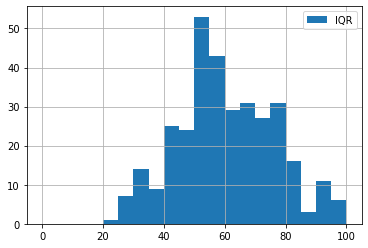

In [47]:
show_numerical(df.score, (0, 100), bins=20)

Теперь больше похоже на правду. Большая часть оценок сосредоточена в диапазоне от 40 до 80, но есть и те, кто занимается математикой крайне успешно. Большинство учащихся занимаются математикой на уровне "удовлетворительно" и выше его.

### 3. Проводим корреляционный анализ 

Попробуем определить, какие столбцы коррелируют с оценкой по математике. Корреляционный анализ выполняем только для числовых столбцов - это age, absences и scores:

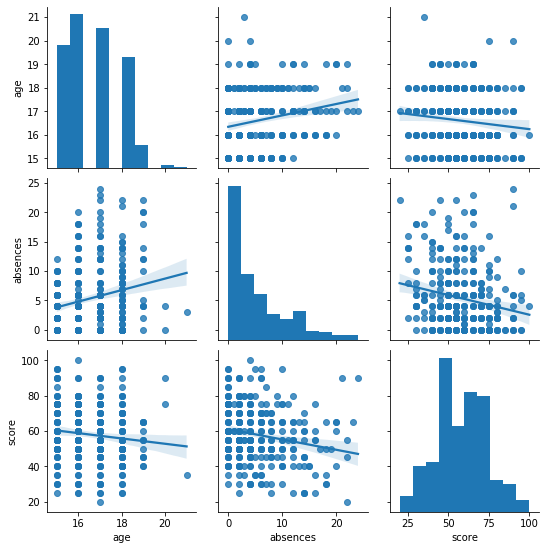

In [48]:
sns.pairplot(df[['age', 'absences', 'score']], kind='reg')

Посмотрим, как это выглядит в числах:

In [49]:
df[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.217504,-0.113502
absences,0.217504,1.000000,-0.197895
score,-0.113502,-0.197895,1.000000


__Выводы__: Можно заметить, что у нас есть слабая обратная корреляция между оценкой и количеством прогулов, а также между оценкой и возрастом. Получается, чем старше учащийся, тем меньше у него бал по математике, что может говорить о том, что с возрастом люди могут относится к предмету проще, либо для более взрослых учащихся дается более сложная программа. С прогулами ситуация вполне закономерная - чем больше человек прогуливает, тем хуже он учится. Но так, как характер корреляции довольно слабый, говорить о каком-то катострафическом влиянии десятка прогулов или слишком большого возраста учащегося тут не приходится.

### 4. Проводим анализ номинативных переменных

Для номинативных переменных мы можем посмотреть, насколько различные факторы влияют на успевамость учащегося. Для этого воспользуемся усатыми ящиками (boxplot):

school


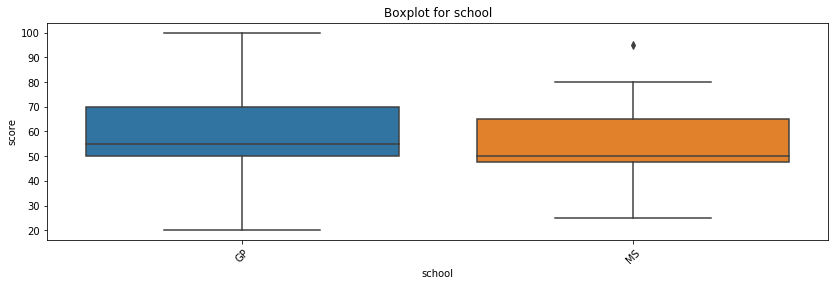

sex


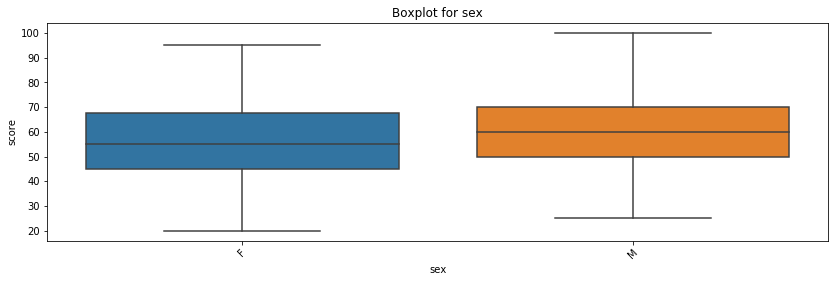

address


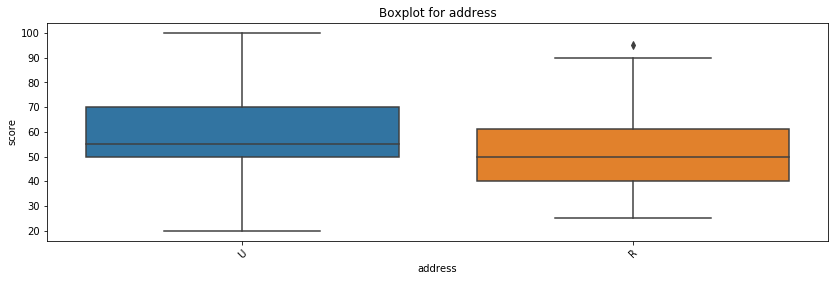

famsize


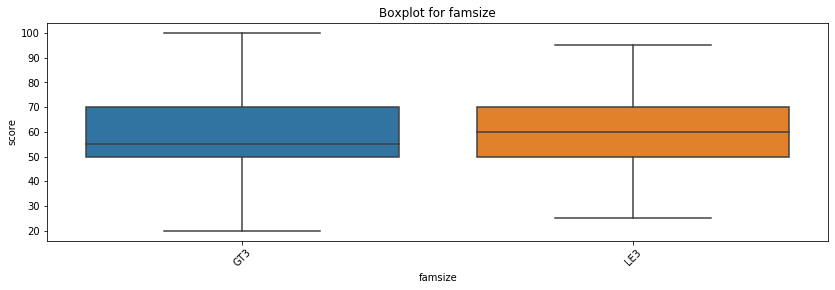

pstatus


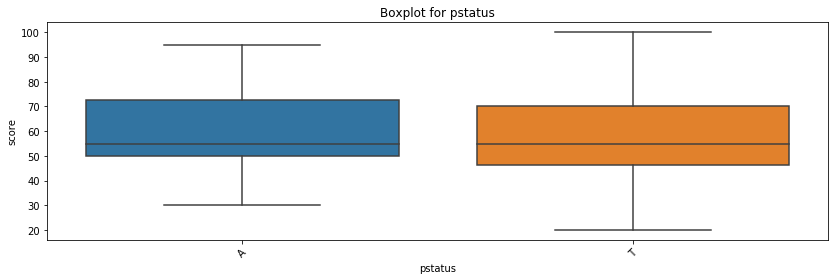

medu


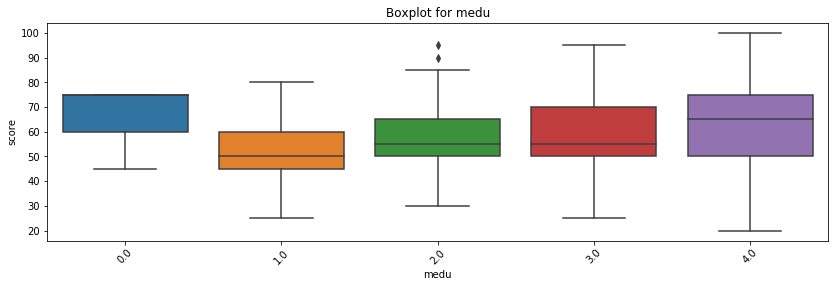

fedu


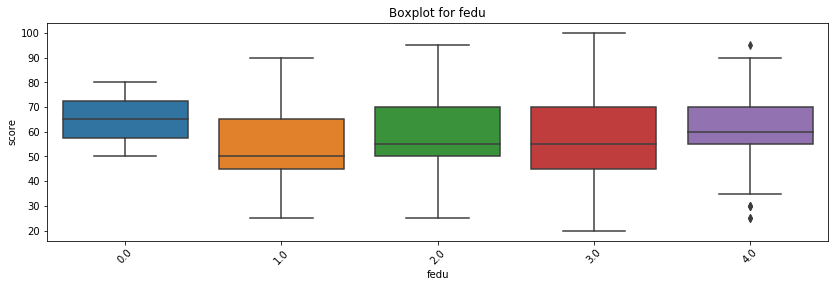

mjob


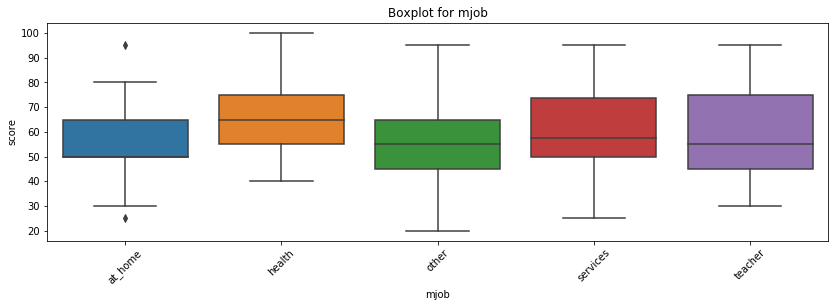

fjob


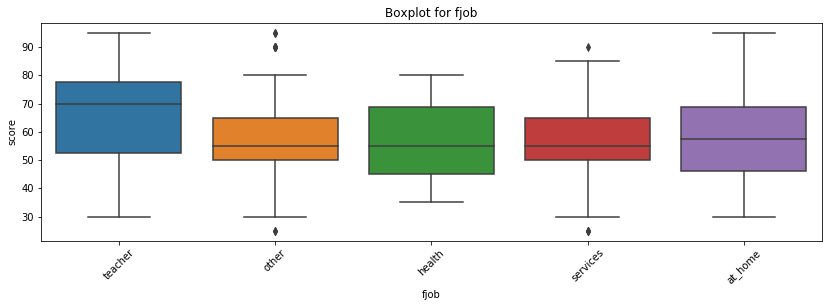

reason


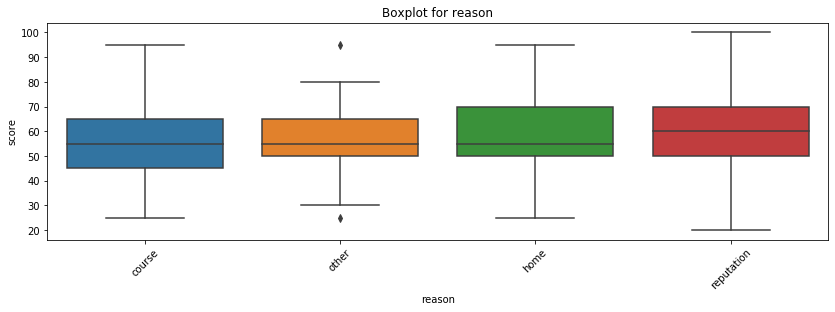

guardian


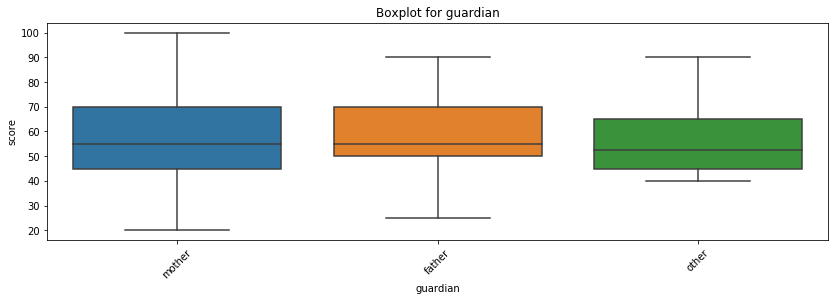

traveltime


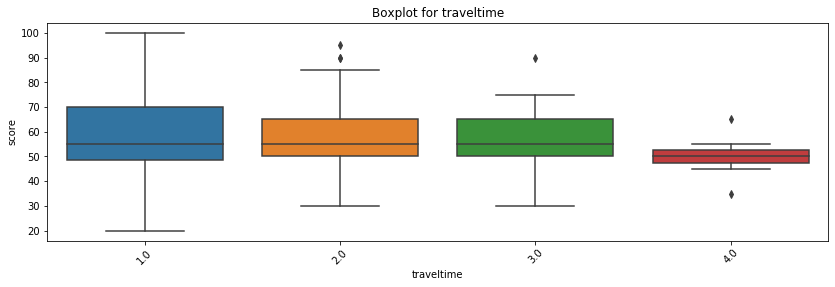

studytime


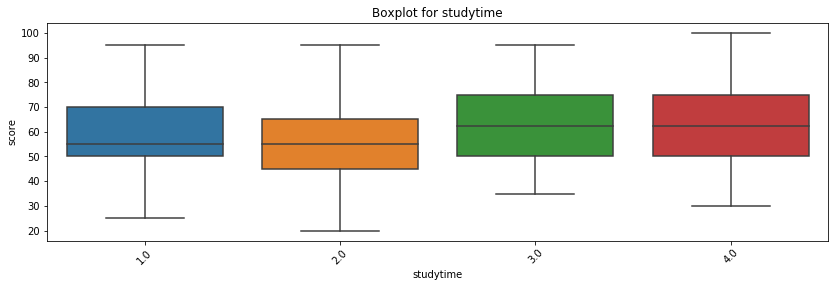

failures


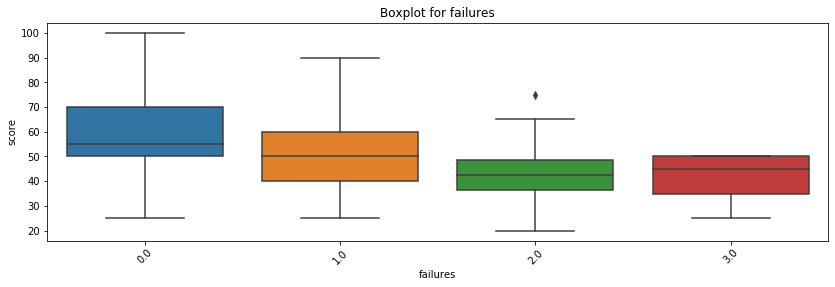

schoolsup


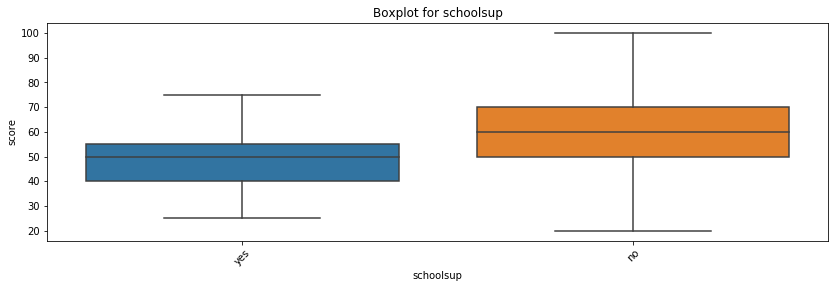

famsup


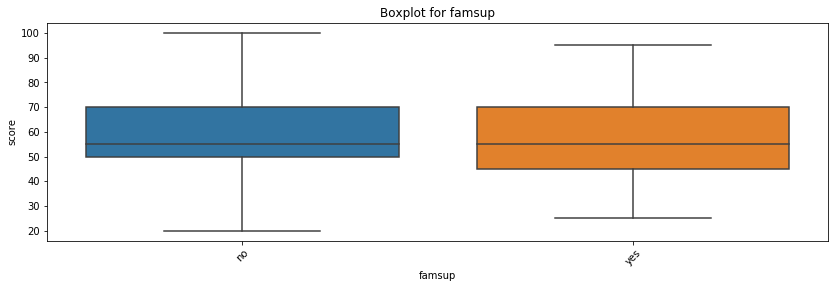

paid


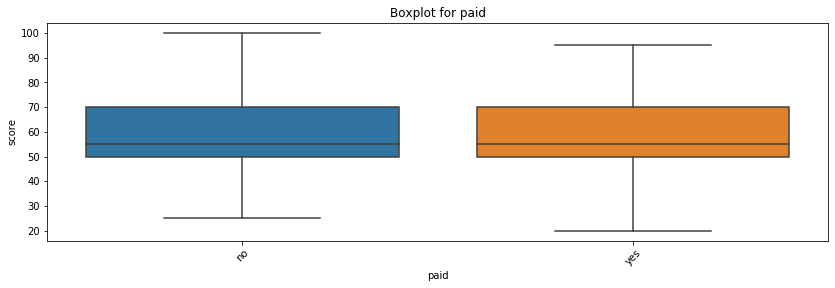

activities


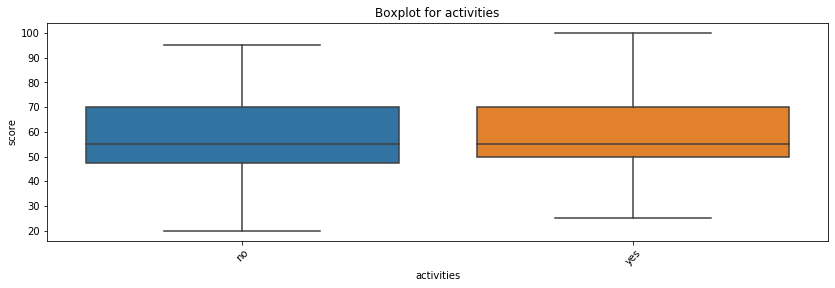

nursery


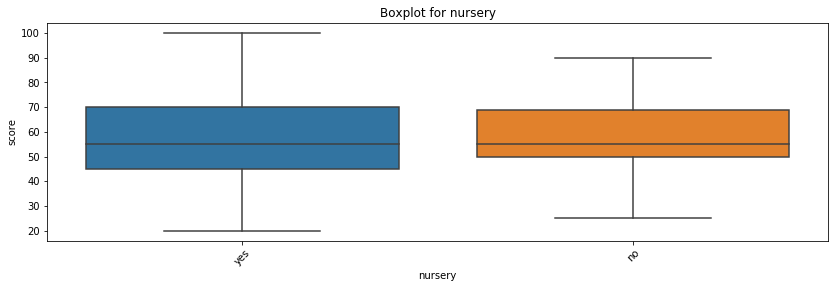

higher


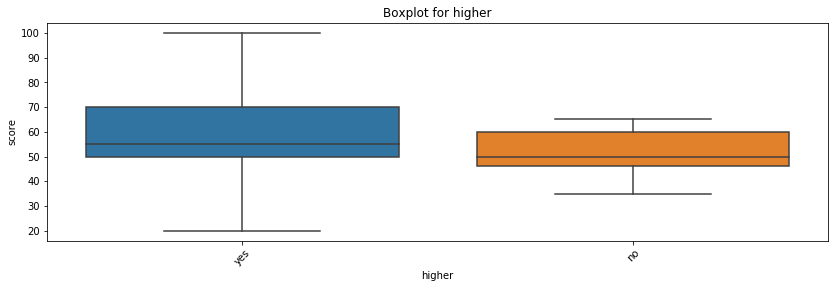

internet


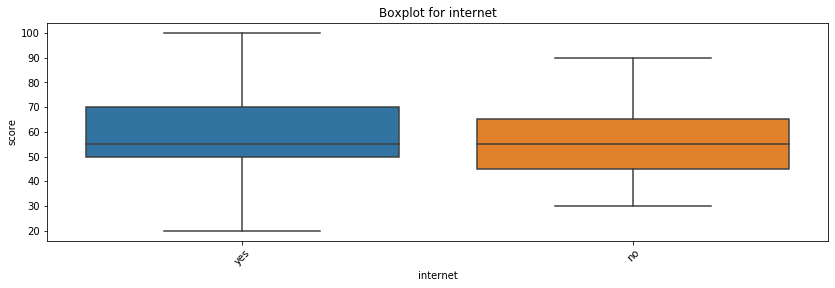

romantic


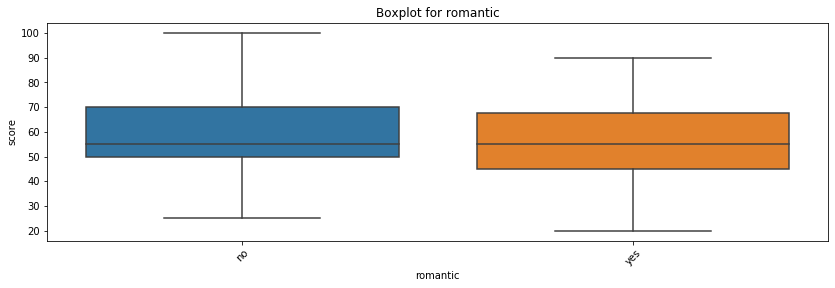

famrel


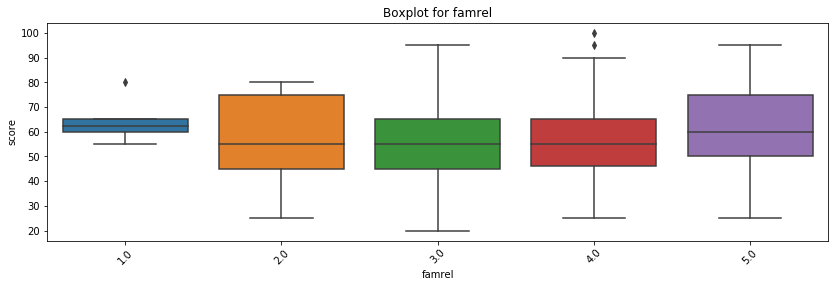

freetime


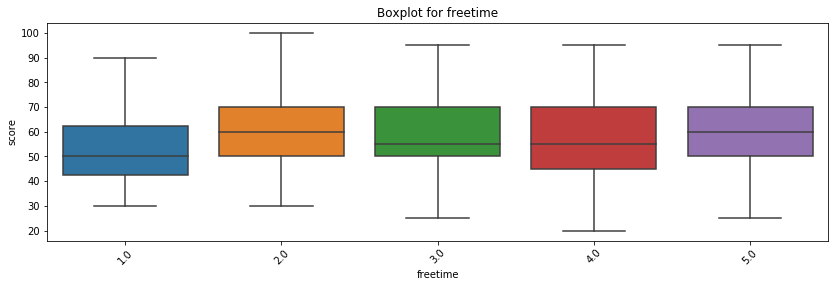

goout


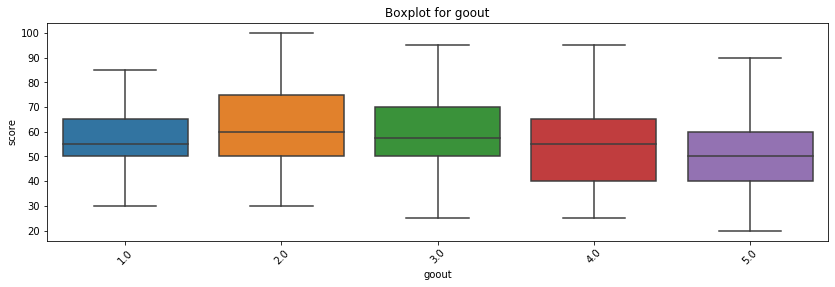

health


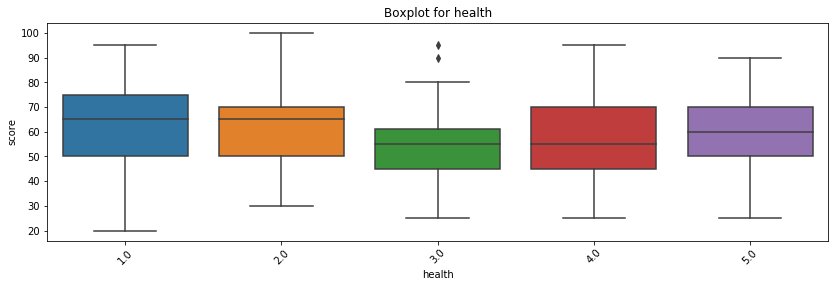

In [50]:
ignore = ['age', 'absences', 'score']

for col in df.columns:
    if col not in ignore:
        get_boxplot(col)

Пройдемся по каждому графику и сделаем предположения без оглядки на статистическую значимость.

- school - В MS успехи кучнее, но меньше. Не забываем, что из MS не так много учащихся, потому и разбег меньше.
- sex - удивительно, что в целом, юноши учатся немного лучше, чем девушки. Впрочем, не стоит забывать, что наш предмет математика, а потому юношам, как точная наука, он должен даваться проще.
- address - городские учащиеся показывают лучшие результаты, чем ребята из загорода. Может объяснятся и другими приоритетами, особенностью воспитания, дополнительными потерями времени на дорогу до школуы и многим другим. 
- famsize - в небольших семьях немного лучше успеваемость, если смотреть на медиану.
- pstatus - учащиеся, у которых родители живут раздельно, учатся чуточку лучше. Что немного неожиданно.
- medu и fedu - имеют похожий вид, только в случае матерей, тенденция более ярко выраженная. Удивительно, что дети родителей без образования получают в среднем более высокие оценки, но возможно, что таких детей крайне мало в выборке (на это указывает высокая кучность результатов). 
- mjob и fjob - достаточно высокие результаты показывают дети, у которых родители являются учителями, что вполне соответствует обычным представлениям.
- reason - каких-то ярко выраженных зависимостей не вижу.
- guardian - нижная граница у other достаточно высокая. И основная масса учащихся имеют оценку, достаточно близкую к ней. Возможно за опекунами, которые не являются матерью или отцом, более пристально следят социальные службы, и основная масса учится ровно на столько, на сколько достаточно соответствовать, чтобы у опекуна не отобрали учащегося?)))
- traveltime - чего-то сильно явного нет, скорее по данному графику можно сказать, что чем ближе к школе, тем больше учащихся в эту группу входит. То есть школу выбирают в том числе и из-за близости к дому. А вот на успевамость это влияет так, что чем дальше от дому учащиеся живут, тем меньше среди лучших из них наивысшая оценка.
- studytime - учащиеся, занимающиеся дополнительно помимо школы, учатся по математике лучше.
- failures - у учащихся с большим количеством неудач и оценки тоже хуже.
- schoolsup - учащимся с низкими оценками предоставляют дополнительную образовательную поддержку, я бы не стал говорить, что она является причиной низких оценок, скорее это следствие.
- fumsup - сложно увидеть какую-то явную закономерность.
- paid - платные занятия не особо влияют на успешность оценки по математике.
- activities - как и дополнительные внеучебные занятия (что бы это значило?).
- nursey - посещение детского сада также не особо влияет на оценки.
- higher - а вот желание получить высшее образование мотивирует учащихся заниматься усерднее.
- internet - немного влияет в лучшую сторону.
- romantic - учащиеся в отношения имеют оценки хуже.
- famrel - плохие семейные отношения мешают получать более высокие баллы.
- freetime - свободное время после школы почти никак не влияет на оценки кроме случая, когда его совсем мало.
- goout - чем больше учащиеся гуляют с друзьями, тем хуже учатся, что логично. А если совсем не гуляют, то успеваемость также достаточно низкая.
- health - успеваемость лучше у не очень здоровых учащихся, чем у среднездоровых. 

Проверим, для каких столбцов у нас имеются статистически значимые различия. Для этого воспользуемся тестом стьюдента:

In [51]:
ignore = ['age', 'absences', 'score']

for col in df.columns:
    if col not in ignore:
        get_stat_diff(col)
        

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Итак, статистически значимыми у нас остались 8 столбцов:

- address; 
- medu;
- fedu;
- mjob;
- studytime;
- failures;
- schoolsup;
- goout. 

Кроме того, у нас еще есть age и absences, которые показали коррелляцию.

Оставим все эти столбы для создания модели в будущем:

In [52]:
df_clean = df.loc[:, [
    'address',
    'age',
    'medu',
    'fedu',
    'mjob',
    'studytime',
    'failures',
    'schoolsup',
    'goout',
    'absences',
    'score'
]]

df_clean

,address,age,medu,fedu,mjob,studytime,failures,schoolsup,goout,absences,score
0,U,18,4.0,4.0,at_home,2.0,0.0,yes,4.0,6.0,30.0
1,U,17,1.0,1.0,at_home,2.0,0.0,no,3.0,4.0,30.0
2,U,15,1.0,1.0,at_home,2.0,3.0,yes,2.0,10.0,50.0
3,U,15,4.0,2.0,health,3.0,0.0,no,2.0,2.0,75.0
4,U,16,3.0,3.0,other,2.0,0.0,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
388,U,18,3.0,1.0,teacher,2.0,0.0,no,4.0,0.0,40.0
391,U,17,3.0,1.0,services,1.0,0.0,no,5.0,3.0,80.0
392,R,21,1.0,1.0,other,1.0,3.0,NaN,3.0,3.0,35.0
393,R,18,3.0,2.0,services,1.0,0.0,no,1.0,0.0,50.0


## Выводы

__1.__ В данных не так много пустых значений. Не более 40 в каждом из столбце из набора в 395 строк. Итоговый размер после чистки строк с невалидными значениями в score их осталось 330. 

__2.__ Выбросы есть, но их не так много. Был отсеян один 22-летний учащийся, а также учащиеся, прогулявшие более 24 занятий, кроме того были отсеяны учащиеся с оценкой по математике в 0 балов и вообще без оценок. В целом, данные достаточно чистые. 

__3.__ Можно заметить, что у нас есть слабая обратная корреляция между оценкой и количеством прогулов, а также между оценкой и возрастом. Получается, чем старше учащийся, тем меньше у него бал по математике, что может говорить о том, что с возрастом люди могут относится к предмету проще, либо для более взрослых учащихся дается более сложная программа. С прогулами ситуация вполне закономерная - чем больше человек прогуливает, тем хуже он учится. Но так, как характер корреляции довольно слабый, говорить о каком-то катострафическом влиянии десятка прогулов или слишком большого возраста учащегося тут не приходится.

По номинативным переменным можно отметить, что:

- Городские учащиеся показывают лучшие результаты, чем ребята из загорода. Может объяснятся и другими приоритетами, особенностью воспитания, дополнительными потерями времени на дорогу до школуы и многим другим. 
- Образование родителей похожим образом влияют на успеваемость, только в случае матерей, тенденция более ярко выраженная. Удивительно, что дети родителей без образования получают в среднем более высокие оценки, но возможно, что таких детей крайне мало в выборке (на это указывает высокая кучность результатов). 
- Если мать является учителем, то ее дети показывают достаточно высокие результаты, что вполне соответствует обычным представлениям.
- Учащиеся, занимающиеся дополнительно помимо школы, учатся по математике лучше.
- У учащихся с большим количеством неудач имеются более низкие баллы по математике.
- Учащимся с низкими оценками предоставляют дополнительную образовательную поддержку, я бы не стал говорить, что она является причиной низких оценок, скорее это их следствие.
- Чем больше учащиеся гуляют с друзьями, тем хуже учатся, что логично. А если совсем не гуляют, то успеваемость также достаточно низкая. 


__4.__ Статистически значимыми столбцами у нас являются:


- address; 
- medu;
- fedu;
- mjob;
- studytime;
- failures;
- schoolsup;
- goout.

Коррелирующими переменными:
- absences;
- age

И плюс самый важный столбец: score. 

Все эти столбы предлагается включить в модель.